## 와인 - 이진분류

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import heejin
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
data = pd.read_csv('../data/text/winequality-white.csv', sep= ';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# 중복치 확인 및 제거
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
heejin.find_outlier_iqr(data) # 이상치 확인

iqr - fixed acidity의 이상치 개수 : 106
iqr - volatile acidity의 이상치 개수 : 133
iqr - citric acid의 이상치 개수 : 223
iqr - residual sugar의 이상치 개수 : 16
iqr - chlorides의 이상치 개수 : 178
iqr - free sulfur dioxide의 이상치 개수 : 44
iqr - total sulfur dioxide의 이상치 개수 : 14
iqr - density의 이상치 개수 : 6
iqr - pH의 이상치 개수 : 46
iqr - sulphates의 이상치 개수 : 96
iqr - alcohol의 이상치 개수 : 0
iqr - quality의 이상치 개수 : 156


In [342]:
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.462869
pH                      0.123829
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64

In [343]:
target = data['quality']
feature = data[data.columns[:-1]]

In [344]:
target.value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

(array([  20.,  153.,    0., 1175.,    0., 1788.,  689.,    0.,  131.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

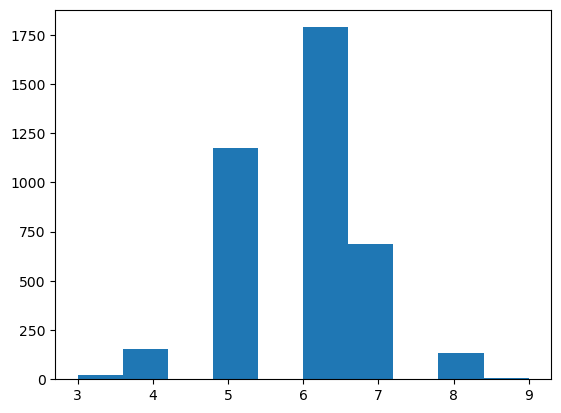

In [345]:
plt.hist(target) 
# 3, 4, 5 => 0
# 6, 7, 8, 9 => 1

In [346]:
target.replace([3,4,5],0, inplace=True)
target.replace([6,7,8,9],1, inplace=True)
print(target)

0       1
1       1
2       1
3       1
4       1
       ..
3956    1
3957    0
3958    1
3959    1
3960    1
Name: quality, Length: 3961, dtype: int64


In [347]:
feature.shape # 11개

(3961, 11)

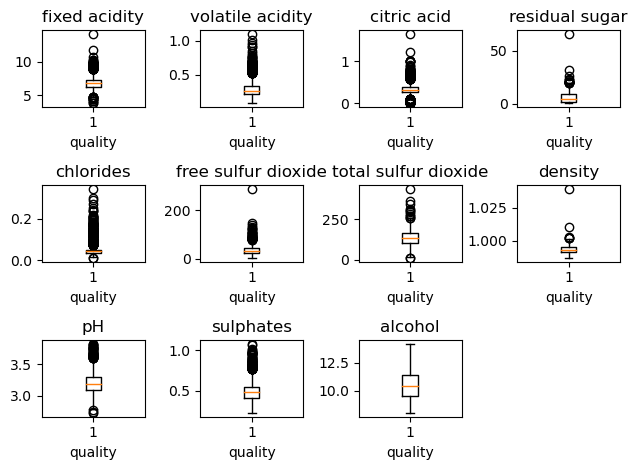

In [348]:
heejin.print_box(3,4,target,feature) # minmaxScaler 이용

In [349]:
random_max = heejin.find_random_state(feature,target)

radom_state = 10
score : 0.27779349979718804


In [350]:
# 학습용 데이터 셋 나누기
xtrain, xtest, ytrain, ytest = train_test_split(feature,target, test_size=0.2, stratify=target, random_state=random_max)

In [351]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [352]:
# 텐서로 만들기
xtrain = torch.tensor(xtrain, dtype=torch.float)

ytrain = torch.tensor(ytrain.values, dtype=torch.float)
ytrain = ytrain.unsqueeze(dim = 1)

xtest = torch.tensor(xtest, dtype=torch.float)

ytest = torch.tensor(ytest.values, dtype=torch.float)
ytest = ytest.unsqueeze(dim = 1)

In [353]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

(torch.Size([3168, 11]),
 torch.Size([793, 11]),
 torch.Size([3168, 1]),
 torch.Size([793, 1]))

In [354]:
model = nn.Sequential( nn.Linear(11, 1), nn.Sigmoid() )

In [367]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr= 1e-3)

In [368]:
best_accuracy = 0.0
epochs = 10000
for epoch in range(epochs + 1):
    ypre = model(xtrain)

    # cost(오차) 계산 => 이진 분류 손실함수  binary_cross_entropy()
    # y = 0일때 오차,  = 1일때 오차를 계산해줌
    # 산출한 오차를 바탕으로 경사하강법으로 업데이트
    cost = F.binary_cross_entropy(ypre, ytrain)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 10 == 0:
        prediction = ypre >= torch.FloatTensor([0.5])   
        correct_prediction = prediction.float() == ytrain  # list
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산

        print(f'Epoch {epoch:4d}/{epochs} Cost: {cost.item():.6f} Accuracy {accuracy * 100:2.2f}%')
        
        if accuracy < best_accuracy:
            print("=================== 학습 종료 ====================")
            break
        else:
            best_accuracy = accuracy  # 정확도 업데이트

Epoch    0/10000 Cost: 0.526056 Accuracy 73.20%
Epoch   10/10000 Cost: 0.526055 Accuracy 73.20%
Epoch   20/10000 Cost: 0.526054 Accuracy 73.20%
Epoch   30/10000 Cost: 0.526053 Accuracy 73.20%
Epoch   40/10000 Cost: 0.526052 Accuracy 73.20%
Epoch   50/10000 Cost: 0.526051 Accuracy 73.20%
Epoch   60/10000 Cost: 0.526050 Accuracy 73.20%
Epoch   70/10000 Cost: 0.526049 Accuracy 73.20%
Epoch   80/10000 Cost: 0.526048 Accuracy 73.20%
Epoch   90/10000 Cost: 0.526047 Accuracy 73.20%
Epoch  100/10000 Cost: 0.526046 Accuracy 73.20%
Epoch  110/10000 Cost: 0.526045 Accuracy 73.20%
Epoch  120/10000 Cost: 0.526044 Accuracy 73.20%
Epoch  130/10000 Cost: 0.526043 Accuracy 73.20%
Epoch  140/10000 Cost: 0.526042 Accuracy 73.20%
Epoch  150/10000 Cost: 0.526041 Accuracy 73.20%
Epoch  160/10000 Cost: 0.526040 Accuracy 73.20%
Epoch  170/10000 Cost: 0.526039 Accuracy 73.20%
Epoch  180/10000 Cost: 0.526038 Accuracy 73.20%
Epoch  190/10000 Cost: 0.526037 Accuracy 73.20%
Epoch  200/10000 Cost: 0.526036 Accuracy